In [1]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Q5 Self-fulfilling prophecies

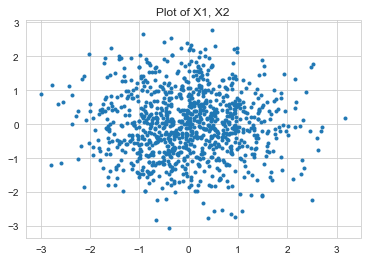

In [2]:
# a). 
# set random seed
np.random.seed(0)
mean = [0,0] 
cov = [[1, 0], [0, 1]]
x1, x2 = np.random.multivariate_normal(mean, cov, 1000).T
# plot x1, x2
plt.scatter(x1, x2, marker = '.')
plt.title(r'Plot of X1, X2')
plt.show()

In [3]:
# b). 
X = np.concatenate((x1[:, None], x2[:, None]), axis=1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y = kmeans.labels_

In [4]:
data = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
data.head()

,x1,x2,y
0,1.764052,0.400157,0
1,0.978738,2.240893,1
2,1.867558,-0.977278,0
3,0.950088,-0.151357,0
4,-0.103219,0.410599,1


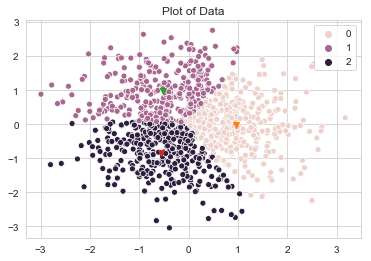

In [5]:
# cluster center 
d = {}
d[0] = [data[data['y'] == 0]['x1'].mean(), 
        data[data['y'] == 0]['x2'].mean()]
d[1] = [data[data['y'] == 1]['x1'].mean(), 
        data[data['y'] == 1]['x2'].mean()]
d[2] = [data[data['y'] == 2]['x1'].mean(), 
        data[data['y'] == 2]['x2'].mean()]

# Create plot
ax = sns.scatterplot(x1, x2, hue=y)
ax.set_title('Plot of Data')
plt.scatter(d[0][0], d[0][1], marker='v')
plt.scatter(d[1][0], d[1][1], marker='v')
plt.scatter(d[2][0], d[2][1], marker='v')
plt.show()

In [6]:
# c). modify data
c1, c2 = [], []
for i, row in data.iterrows():
    c1.append(.99*row['x1'] + .01*d[row['y']][0])
    c2.append(.99*row['x2'] + .01*d[row['y']][1])
data['c1'], data['c2'] = c1, c2

In [7]:
data.head()

,x1,x2,y,c1,c2
0,1.764052,0.400157,0,1.756000,0.396016
1,0.978738,2.240893,1,0.963691,2.228221
2,1.867558,-0.977278,0,1.858471,-0.967644
3,0.950088,-0.151357,0,0.950176,-0.149983
4,-0.103219,0.410599,1,-0.107446,0.416229


In [8]:
kmeans_new = KMeans(n_clusters=3, 
                    random_state=0).fit(data[['c1', 'c2']])
y_new = kmeans_new.labels_

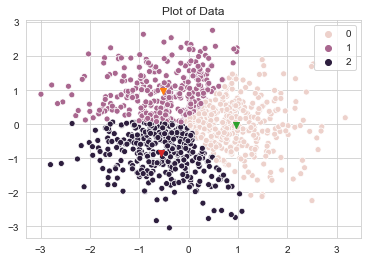

In [9]:
data['y_new'] = y_new
d_new = {}
d_new[0] = [data[data['y_new'] == 0]['c1'].mean(),
            data[data['y_new'] == 0]['c2'].mean()]
d_new[1] = [data[data['y_new'] == 1]['c1'].mean(),
            data[data['y_new'] == 1]['c2'].mean()]
d_new[2] = [data[data['y_new'] == 2]['c1'].mean(), 
            data[data['y_new'] == 2]['c2'].mean()]

# Create plot
ax = sns.scatterplot(x1, x2, hue=y)
ax.set_title('Plot of Data')
plt.scatter(d_new[0][0], d_new[0][1], marker='v')
plt.scatter(d_new[1][0], d_new[1][1], marker='v')
plt.scatter(d_new[2][0], d_new[2][1], marker='v')
plt.show()

In [10]:
# d)
# define a function 
def clustering(x1, x2, y, n):  
    data = pd.DataFrame({'x1': np.nan, 'x2':np.nan, 
                         'y':np.nan, 'c1': x1, 'c2': x2, 'y_new': y})
    for _ in range(n):
        data['x1'], data['x2'], data['y'] = data['c1'], data['c2'], data['y_new']
        # find centers 
        d = {}
        d[0] = [data[data['y'] == 0]['x1'].mean(), 
                data[data['y'] == 0]['x2'].mean()]
        d[1] = [data[data['y'] == 1]['x1'].mean(), 
                data[data['y'] == 1]['x2'].mean()]
        d[2] = [data[data['y'] == 2]['x1'].mean(), 
                data[data['y'] == 2]['x2'].mean()]   
        # modify the data
        c1, c2 = [], []
        for _, row in data.iterrows():
            c1.append(.99*row['x1'] + .01*d[row['y']][0])
            c2.append(.99*row['x2'] + .01*d[row['y']][1])
        data['c1'], data['c2'] = c1, c2
        # clustering and find the cluster centers
        kmeans = KMeans(n_clusters=3, random_state=0).fit(data[['c1', 'c2']])
        data['y_new'] = kmeans.labels_                
    return data[['c1', 'c2', 'y_new']]

In [11]:
# repeat the previous section using the function 
data1 = clustering(x1, x2, y, 1)
# run 50 times
data50 = clustering(x1, x2, y, 50)

In [12]:
data50.head()

,c1,c2,y_new
0,1.446002,0.236599,2
1,0.384400,1.740359,0
2,1.508624,-0.596758,2
3,0.953549,-0.097071,2
4,-0.270190,0.633019,0


Text(0.5, 1.0, 'Modified Data')

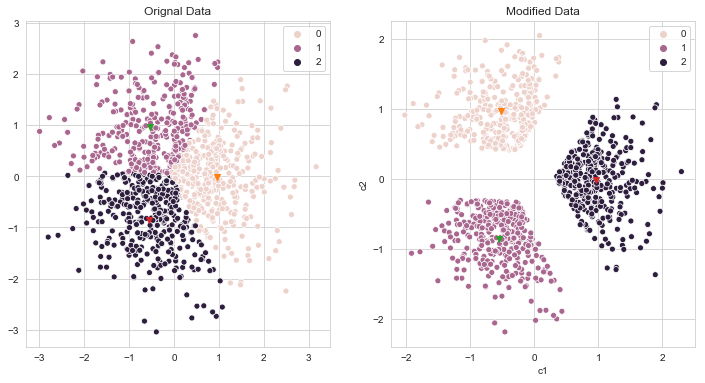

In [13]:
#Creates two subplots and unpacks the output array immediately
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)   

plt = sns.scatterplot(x1, x2, hue=y)
plt.scatter(d[0][0], d[0][1], marker='v')
plt.scatter(d[1][0], d[1][1], marker='v')
plt.scatter(d[2][0], d[2][1], marker='v')
plt.set_title(r'Orignal Data')

fig.add_subplot(122)   
plt = sns.scatterplot(data50['c1'], data50['c2'], 
                      hue=np.array(data50['y_new']))
plt.scatter(data50[data50['y_new'] == 0]['c1'].mean(), 
            data50[data50['y_new'] == 0]['c2'].mean(), 
            marker='v')
plt.scatter(data50[data50['y_new'] == 1]['c1'].mean(), 
            data50[data50['y_new'] == 1]['c2'].mean(), 
            marker='v')
plt.scatter(data50[data50['y_new'] == 2]['c1'].mean(), 
            data50[data50['y_new'] == 2]['c2'].mean(), 
            marker='v')
plt.set_title(r'Modified Data')

In [14]:
d

{0: [0.9588493968462313, -0.013921628912623529],
 1: [-0.5259373770143098, 0.9736974023038841],
 2: [-0.5574234281584867, -0.8574365441550432]}

In [15]:
# modified cluster centers, with different orders 
d_new = {}
d_new[0] = [data50[data50['y_new'] == 0]['c1'].mean(),
            data50[data50['y_new'] == 0]['c2'].mean()]
d_new[1] = [data50[data50['y_new'] == 1]['c1'].mean(),
            data50[data50['y_new'] == 1]['c2'].mean()]
d_new[2] = [data50[data50['y_new'] == 2]['c1'].mean(),
            data50[data50['y_new'] == 2]['c2'].mean()]
d_new

{0: [-0.5259373770143102, 0.9736974023038837],
 1: [-0.5574234281584863, -0.8574365441550426],
 2: [0.9588493968462314, -0.01392162891262391]}

Unlike the original data, the modified clustered are disjoint, however, the cluster centers remain the same.